In [1]:
import numpy as np
import pandas as pd
import matplotlib
print matplotlib.__version__
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import NS_tidalcapture as tc


%matplotlib inline

matplotlib.rcParams.update({'font.size': 24})
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1095/syr904/projects/PULSAR2/newruns/tidal_capture/'

1.5.1


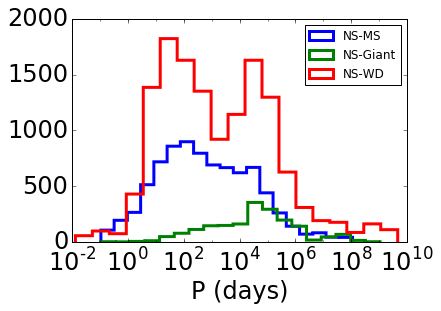

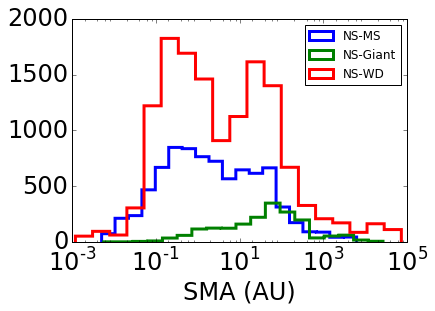

In [24]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 0.5)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper right', prop={'size': 12})
plt.locator_params(axis='x', numticks=9)

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper right', prop={'size': 12})
plt.locator_params(axis='x', numticks=7)

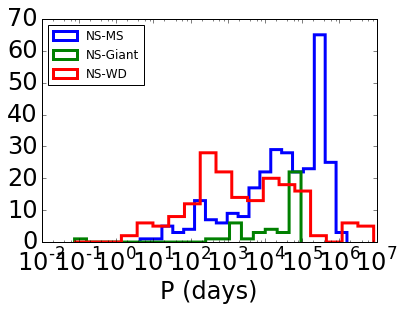

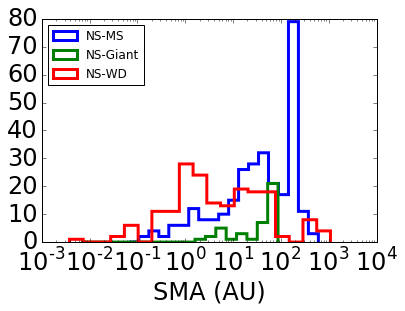

In [19]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 2)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper left', prop={'size': 12})

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper left', prop={'size': 12})

0
10858 265 20
1331 5 1
3975 361 43


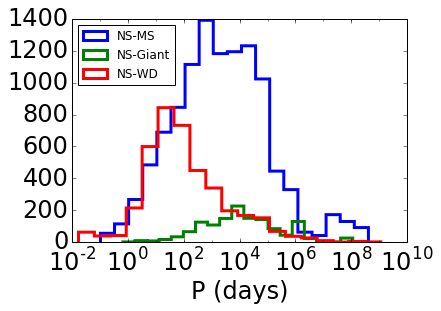

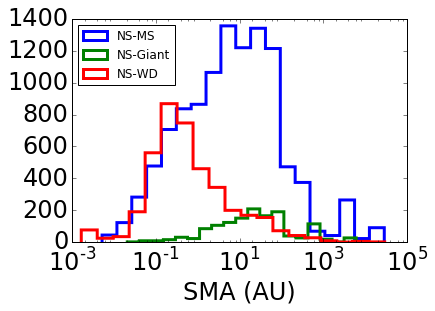

In [4]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 0.5)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper left', prop={'size': 12})
plt.locator_params(axis='x', numticks=9)

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper left', prop={'size': 12})
plt.locator_params(axis='x', numticks=7)